<a href="https://colab.research.google.com/github/ZKellock/MAT421/blob/main/MAT421ModuleD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.1 Introduction**
*   Linear algebra is important for solving problems involving multiple equations. It is used for many present day applications such as data science and machine learning
*   While it can be done by hand, it is much faster to use programs to solve.

In [6]:
import numpy as np
row = np.array([[1, 2, 3, 4, 5, 6]])
col = np.array([[7], [8], [9], [10]])

print("Shape of row: ", row.shape)
print("Shape of col: ", col.shape)


a = np.array([[1, 2, 3]])
b = np.array([[4, 5, 6]])
print("Cross Product of a and b: ", np.cross(a, b))
print("Dot Product of col and row: ", np.dot(col, row))

Shape of row:  (1, 6)
Shape of col:  (4, 1)
Cross Product:  [[-3  6 -3]]
Dot Product:  [[ 7 14 21 28 35 42]
 [ 8 16 24 32 40 48]
 [ 9 18 27 36 45 54]
 [10 20 30 40 50 60]]


**1.2 Elements of Linear Algebra**

Linear Combination
*   Constructs a new vector by multiplying exisitng vectors by a scalar and adding the results
*   Can be done with as many vectors as desired

Linear Subspace
*   Constructed with linear combination

In [8]:
v = np.array([[6, -5, 5]])
w = np.array([[0, 4, -9]])
u = np.array([[3, -2, 0]])
x = 4*v-3*w+2*u
print(x)

[[ 30 -36  47]]


Span
*   Span is the set of all linear combinations of a set of vectors
*   A span is a linear subspace

Column Space
*   If A is a matrix, the column space of A is the span of the columns of A

Linear Independence
*   A set of vectors are linearly independent if none of the vectors in the set can be written as a linear combination of the other vectors
*   Putting vectors into a matrix and checking a determinant can check linear independence. Zero means the vectors are linearly dependent.

In [14]:
A=np.array([[9, -9, 0], [4, 1, 7], [6, -1, 13]])
print(np.linalg.det(A)) # linearly independent

B=np.array([[0, 0, 0], [4, 6, 1], [0, -2, 0]])
print(np.linalg.det(B)) # linearly dependent

269.99999999999983
0.0


Dimension Theorem
*   If U is a subset of V, any basis of U will have the same length and number of elements
*   The number of elements is known as the dimension

Orthonormal Bases
*   Vectors are orthonormal if they are pariwise orthogonal and have a norm of 1

In [17]:
# If angle between vectors is pi/2, the vectors are orthogonal
from numpy import arccos, dot
from numpy.linalg import norm

v = np.array([[12, 9, 3]])
w = np.array([[2, 7, 12]])
theta = arccos(dot(v, w.T)/(norm(v)*norm(w)))
print(theta) # These vectors are not orthogonal

[[0.96078037]]


Best Approximation Theorem
*   Let U be a subset of V and a linear subspace with orthonormal basis and v be an element of V. for any u the is an element of U, $||v-Pu v|| <= ||v-u||$

Pythagorean Theorem
*   If u and v are elements of V and are orthogonal then $||u+v||^2 = ||u||^2 + ||v||^2$

Eigenvalues and Eigenvectors
*   Eigenvalues and Eigenvectors can be found using the formula $Ax=\lambda x$
*   A is a square matrix and x is a column vector with the same number of rows as A. $\lambda$ is a scalar. Any $\lambda$ that satisfies the equation is known as an eigenvalue of the matrix A
*   The associated vector x is called the eigenvector for that $\lambda$

In [21]:
from numpy.linalg import eig

a = np.array([[1, 2, 3], [5, 6, 4], [9, 8, 7]])
w,v=eig(a)
print('E-value:', w)
print('E-vector', v)

E-value: [14.80859459 -1.88392795  1.07533337]
E-vector [[-0.25255641 -0.76445483  0.34408609]
 [-0.51525747  0.16920064 -0.77723295]
 [-0.81897803  0.62207713  0.52679569]]


**1.3 Linear Regression**

QR Decomposition
*   An iterative way to find all the eigenvalues and eigenvectors of a matrix

In [23]:
from numpy.linalg import qr

a = np.array([[1, 2, 3],
              [5, 6, 4],
              [7, 8, 9]])
p = [1, 5, 10, 20]

for i in range(20):
    q, r = qr(a)
    a = np.dot(r, q)
    if i+1 in p:
        print(f'Iteration {i+1}:')
        print(a)

Iteration 1:
[[14.89333333 -7.40135466  0.52463139]
 [-1.52160734 -0.17904762 -0.01649572]
 [-1.94422221 -0.59384599  1.28571429]]
Iteration 5:
[[ 1.55393444e+01  4.08788879e+00  4.67051989e+00]
 [-5.29274466e-05  1.58123832e+00  7.14158752e-01]
 [ 3.50998362e-05 -8.59151240e-01 -1.12058275e+00]]
Iteration 10:
[[ 1.55393401e+01  2.12361946e+00 -5.83222535e+00]
 [-2.25745080e-10  1.27718966e+00 -1.64360112e+00]
 [ 1.59982622e-11 -7.02645788e-02 -8.16529791e-01]]
Iteration 20:
[[ 1.55393401e+01  2.31045095e+00 -5.76076631e+00]
 [-4.93436671e-21  1.33021360e+00 -1.57438974e+00]
 [ 4.97546613e-24 -1.05319918e-03 -8.69553732e-01]]


Least Squares Regression
*   Very common method for creating an estimation function to describe data
*   Finds parameters that minimize the squared error between the regression function and data points

[[1.47741417]
 [0.99399355]]


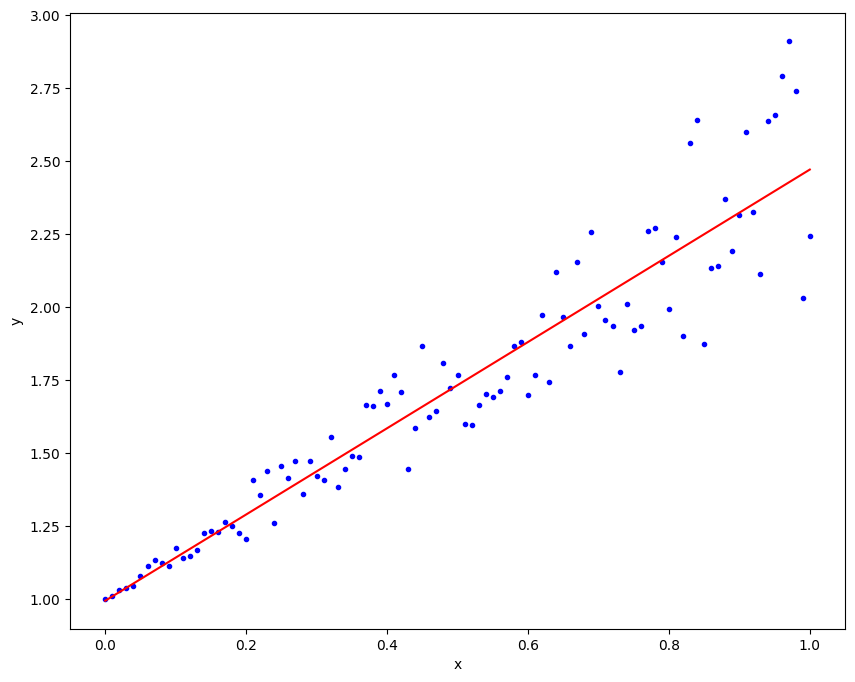

In [24]:
from scipy import optimize
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

A = np.vstack([x, np.ones(len(x))]).T

y = y[:, np.newaxis]

pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x'); plt.ylabel('y')
plt.show()